# **DAY 18: ASSIGNMENT 14 (KNN)**

# **DATE: 21 JUNE 2021**

# **AUTHOR: AAMIR P**

# **REG. ID.: GO_STP_7724**

**We have a dataset that contains multiple user's information through the social network who are interested in buying SUV Car or not.** 

In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
df=pd.read_csv('/content/User_Data.csv')

In [3]:
df.head() #Just to know what's in the csv

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [32]:
x=df.iloc[ : ,[2,3] ]     #integer-location based indexing / selection by position ; the interior brackets are for list, and the outside brackets are indexing operator, i.e. you must use double brackets if you select two or more columns.

In [33]:
y=df.iloc[:,4]

**SPLIT THE DATASET**

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.40,random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler #to change raw feature vectors into a representation ; StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.
s = StandardScaler()


In [37]:
x_train= s.fit_transform(x_train)

In [41]:
x_test= s.transform(x_test)

**KNN**

In [42]:
from sklearn.neighbors import KNeighborsClassifier #Returns the mean accuracy on the given test data and labels.
classifier = KNeighborsClassifier(n_neighbors = 5 , metric ='euclidean', p =5 ) #By default, the KNeighborsClassifier looks for the 5 nearest neighbors. metric -  Euclidean distance for determining the proximity between neighboring points ; the distance metric to use for the tree - P

In [44]:
classifier.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=5,
                     weights='uniform')

In [45]:
y_pred= classifier.predict(x_test) #Classification is the process of predicting the class of given data points ; predict() function enables us to predict the labels of the data values on the basis of the trained model. 
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [47]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[100   0]
 [ 60   0]]


In [48]:
print(" correct predicition",accuracy_score(y_test,y_pred))
print(" worng predicition",(1-accuracy_score(y_test,y_pred)))

 correct predicition 0.625
 worng predicition 0.375


**VISUALIZATION**

In [55]:
from mlxtend.plotting import plot_decision_regions #MLxtend is a library that implements a variety of core algorithms and utilities for machine learning and data mining. ... An implementation of the 5x2 cross-validated paired t-test (Dietterich 1998) allows users to compare the performance of machine learning algorithms to each other ;function for plotting decision regions of classifiers in 1 or 2 dimensions
knn_clf=KNeighborsClassifier(n_neighbors=5)

In [60]:
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


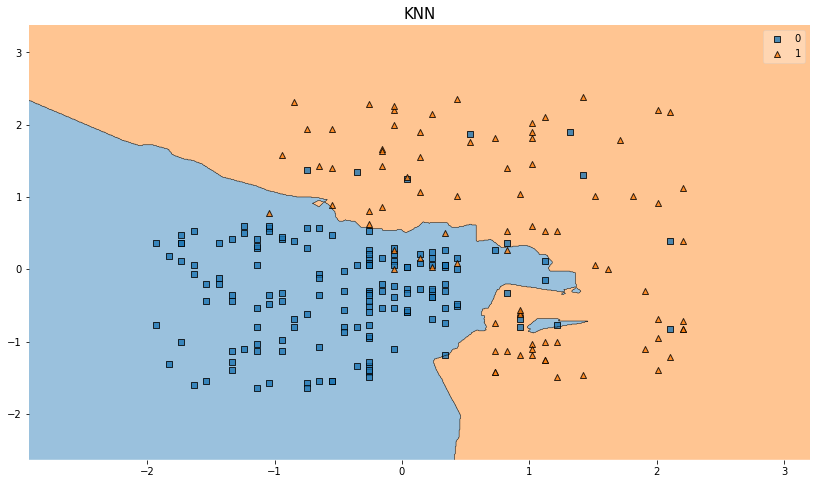

In [64]:
plt.figure(figsize=(14,8))
plot_decision_regions(x_train,y_train.to_numpy(),clf=knn_clf)
plt.title('KNN',fontsize=15)
plt.show()

**Classification Accuracy**

In [65]:
print(accuracy_score(y_test,y_pred))

0.625


**Classification Report**

In [68]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)
#A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. 

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       100
           1       0.00      0.00      0.00        60

    accuracy                           0.62       160
   macro avg       0.31      0.50      0.38       160
weighted avg       0.39      0.62      0.48       160



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
